# Ensemble Learning

- Enseble in literal term refers to the group of artistists performing together. Machine learning use similar notion of ensemble where group of machine models learn together to perform better i.e. predict better results.

- For example, if you have to buy a laptop, you don't directly go randomly to any shop and buy a laptop that shopkeeper shows to you. You visit multiple shops, based on your requirement, specifications available in the market and budget you have you make a choice. But you investigate the laptop models of different brands of different costs and varieties of spec. You may also consult with your friends and family before you make a purchase. This is the process of accumulating information from all possible sources and make a best decision.

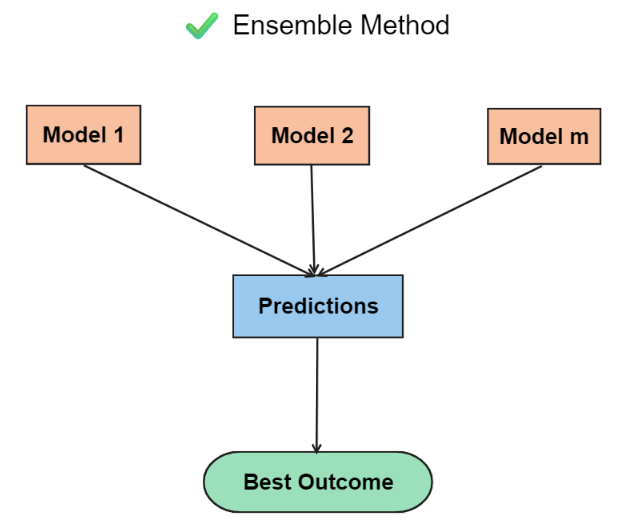

- Same applies to Ensemble learning in machine learning. Ensemble learning is a technique to combine the prediction power of two or more models for better prediction on machine learning tasks. 

- Ensemble learning is, thus, combines the decisions of multiple models in order to improve the overall performance of model to make better decision.

- In ensemble learning technique, several learners are combined to obtain a better performance than any learners individually.

- From the above defianition, we have already kown that the ensemble technique is more powerful then individual models.

There are various ways to combine decision from multiple models. We will discuss them below in details .

Ensemble techniques can be categorized into two types:

#### 1. Simple Ensemble Technique
Under simple ensemble technique following are the techniques:

a. Max Voting

b. Averaging


#### 2. Advance Ensemble technique
This includes:

a. [Bagging](#)

b. [Boosting](#)

c. [Stacking](#)

We will discuss only about Simple Ensemble Technique in this notebook. For advanced, Ensemble technique, browse to the corresponding link above.

In [ ]:
# import libraries
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Ensemble Technique

### a. Max Voting
This method is also called Majority Voting and generally used for classification problems. 

For example, we have three models that classifies whether a given input image is `cat` or `dog`. Two of the classifier 'Classifier A' and 'Classifier B' classifid the input to `cat` and one classifier classified to `dog`. The Ensemble will classify the input as `cat` as per the majority voting.

In [ ]:
# Create three classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# Build Model
model1 = LogisticRegression(random_state = 7)
model2 = DecisionTreeClassifier(random_state = 7)
model3 = LinearSVC(random_state=42)

# Create Voting classifier
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(
    estimators = [
        ('Logistic', model1),
        ('Decision Tree', model2),
        ('Linear SVC', model3)
    ], voting = "hard"
)

# Fit the model and evaluate the result
#model.fit(X_train, y_train)

#model.score(X_test, y_tes)

### b. Averaging



In [ ]:
# Create three regressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

# Build Model
model1 = LinearRegression(random_state = 7)
model2 = LinearSVR(random_state=7)
model3 = RandomForestRegressor(random_state=7)

# train the model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# evaluate the model
y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)
y_pred_3 = model3.predict(X_test)

y_pred = (y_pred_1 + y_pred_2 + y_pred_3) / 3.0

# compute mean squared error
mse = mean_squared_error(y_test, y_pred)
print(mse)

### 3. Weighted Averaging

In [ ]:
# Create three regressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

# Build Model
model1 = LinearRegression(random_state = 7)
model2 = LinearSVR(random_state=7)
model3 = RandomForestRegressor(random_state=7)

# compute scores
scores = []
for model in [model1, model2, model3]:
    # train the model
    model.fit(X_train, y_train)
    
    # evaluate the model
    y_pred = model.predict(X_test)

    # compute mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Append mse to scores
    scores.append(mse)

# Create Averaging evaluator
from sklearn.ensemble import VotingRegressor
ensemble = VotingRegressor(
    estimators= [
    ('Linear', model1),
    ('Linear SVR', model2),
    ('Random Forest',model3)
    ], weights= scores
)

# fit the ensemble model
ensemble.fit(X_train, y_train)

# predict the output
y_pred = ensemble.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(mse)